# Markov chain Monte Calro (MCMC) を用いたサンプリング

## 動機

* カーネルのハイパーパラメータの自動選択
* ベイズの定理の周辺尤度（エビデンス、規格化因子）の計算

## サンプリング

積分の長方形近似
$$
I = \int^{b}_{a} dx f(x) \sim \frac{b-a}{N} \sum_{i=1}^{N} f(x_{i})
$$

ところで区間$x \in [a, b]$の一様分布の確率密度は
$$
  p(x) = \frac{1}{b-a},
$$
であることを思い出すと、上の積分は

$$
  I = \int^{b}_{a} dx f(x) = \int^{b}_{a} dx \frac{f(x)}{p(x)} p(x) \sim \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_{i})}{p(x_{i})}
$$
となる。この式の最後の部分は一様分布からサンプリングした$x_{i}$を使って$f(x)/p(x)$の和を取りなさい、と意味している。
この考えを一般の確率密度に格上げしたものがいわゆる**モンテカルロ積分**である。

次の期待値について考える。

$$
\begin{align}
  E[f(x)] = \int dx f(x) p(x)
\end{align}
$$

ここで$p(x)$は適当な確率分布で、積分は$p(x)$が定義される$x$の範囲について実行する。
この積分は上の例で$f(x)/p(x)$を$f(x)$と取り直したものになるので、

$$
\begin{align}
  E[f(x)] \sim \braket{f} = \frac{1}{N} \sum_{n=1}^{N} f(x_{n}) 
\end{align}
$$

と近似される。ここで$x_{n}$は$p(x)$からサンプリングされた$N$個の確率変数である。
モンテカルロ積分法は高次元の積分を評価するときに威力を発揮する。格子ゲージ理論なんかでは、SU(3)の積分をやろうとすると
$$
  8 \times 4 \times N_{x} \times N_{y} \times N_{z} \times N_{t}
$$
次元の積分をしないといけないこともある。$N$は格子点の数で例えば$N=32$にすると次元は33554432となって、普通のやり方ではとても計算できない。

ここで$p(x)$から直接サンプリングすることは難しいとする。そこで別の分布（提案分布）$q(x)$を用いることにする。

$$
  E[f(x)] = \int dx f(x) p(x) = \int dx q(x) \frac{p(x)}{q(x)} f(x) 
  \sim \frac{1}{N} \sum_{n=1}^{N} w(x_{n}) f(x_{n}) 
$$
ここで$w(x_{n}) \equiv \frac{p(x_{n})}{q(x_{n})}$は重要度重みと呼ばれる。

普通のモンテカルロ
piの計算
高次元では？

10次元以上はハード

importance sampling
スタティックなモンテカルロ法



## マルコフ過程

確率過程の一つで、新しい状態は現在の状態だけに依存するというマルコフ性を持つ。
すなわち新しい状態を生成する確率が
$$
\begin{align}
  \Pr[X(t+h) | X(s), \forall s \leq t] = \Pr[X(t+h) | X(t)],
  \quad \forall h > 0,
\end{align}
$$

$$
\begin{align}
  \Pr[X_{n+1} | X_{n}, X_{n-1}, \cdots, X_{0}] = \Pr[X_{n+1} | X_{n}]
\end{align}
$$
と表せる。

## メトロポリス・ヘイスティング法

[Wikipedia](https://ja.wikipedia.org/wiki/メトロポリス・ヘイスティングス法)
> マルコフ連鎖モンテカルロ法の一つで、直接的に乱数の生成が難しい確率分布に対し、その確率分布に収束するマルコフ連鎖を生成する手法である。

### 物理的な説明

今
$$
\begin{align}
  I = \int dx e^{-S(x)}
\end{align}
$$
の積分をやりたいとする。$x$をランダムに選んできて$x_\text{new}$とする。$S(x_\text{old}) < S(x_\text{new})$となれば
$x_\text{new}$を採用する。（エネルギーがなるべく低い状態になりなさい。）$S(x_\text{old}) > S(x_\text{new})$だったら
$0 < r < 1$の一様な乱数を振って、
$$
e^{-(S(x_\text{new}) - S(x_\text{old}))} > r,
$$
だったらやっぱり採用する。駄目だったら棄却して、また新しい$x$を作る。繰り返す。
乱数を振る部分は$S(x_\text{new})$は$S(x_\text{old})$より大きいけど、そこまで大きくないからまあ許しましょう、
というようなことをやっている。


### Algorhythm

$f(x)$を確率$P(x)$に比例する関数とする。
1. 初期化
  * 初期値$x_{0}$と任意の確率$Q(x|y)$を決める。ここで$Q(x|y)$は提案分布と呼ばれ、過去の状態$y$が与えられたときに、候補となる状態$x$を生成する関数である。

## Hybrid Monte Calro

## Gibbs sampling

## Replica



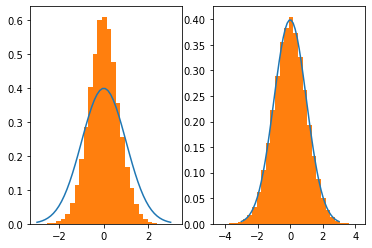

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian distribution sampling
def metropolis_sampling(domain, step=50):
  lower, upper = domain
  rng = np.random.default_rng()
  w = rng.uniform(lower, upper)
  energy = lambda x: x ** 2
  register = [w]
  MAX_ITER = 1_000_000_000

  n = 0
  for _ in range(MAX_ITER):
    if len(register) == step:
      break

    x = register[n] + rng.uniform(-0.5, 0.5)
    if energy(x) < energy(register[n]):
      register.append(x)
      n += 1
    else:
      r = np.random.rand()
      s = np.exp(-energy(x) + energy(register[n]))
      if s > r:
        register.append(x)
        n += 1

  return np.array(register)

def BoxMuller(domain, step=50):
  u1, u2 = np.random.uniform(0, 1, size=(2, step))

  x = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
  y = np.sqrt(-2.0 * np.log(u1)) * np.sin(2.0 * np.pi * u2)
  return x, y

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

x = np.linspace(-3.0, 3.0)
y = np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)

ax1.plot(x, y)
ax1.hist(metropolis_sampling(domain=(-3.0, 3.0), step=100_000), bins=30, density=True)


bm = BoxMuller(domain=(-3.0, 3.0), step=100_000)
ax2.plot(x, y)
ax2.hist(bm[0], bins=30, density=True)

plt.show()


###  逆サンプリング法

累積分布関数の逆関数を用いて、標準一様分布に従う確率変数から、所望の分布に従う確率変数を生成させる方法。
累積分布関数は確率変数$x$がある値$x_*$以下となる確率を表す。
$$
  F(x) = \int^{x}_{-\infty} dy p(y)
$$

$U$を一様分布に従う確率変数とすると、
$$
  x = F^{-1}(U)
$$
によりサンプリングされる。

* 指数分布

$p(x) = \lambda e^{-\lambda x}, x \in (0, \infty)$より
$$
  F(x) = \int^{x}_{0} dy p(y) = -e^{\lambda y} \Big|_{0}^{x} = 1 - e^{-\lambda x}
$$
逆関数は
$$
  F^{-1}(x) = -\frac{\ln(1-x)}{\lambda}
$$
これに一様分布から得られる乱数を代入すると指数分布に従う乱数が得られる。


(array([0.93968263, 0.85699056, 0.64650165, 0.66905404, 0.54877466,
        0.46608259, 0.47360005, 0.33076829, 0.35332067, 0.28566352,
        0.25559368, 0.24055875, 0.1729016 , 0.12027938, 0.18793653,
        0.15034922, 0.12027938, 0.10524445, 0.06765715, 0.06765715,
        0.09020953, 0.04510477, 0.04510477, 0.05262223, 0.02255238,
        0.02255238, 0.03006984, 0.01503492, 0.02255238, 0.01503492,
        0.00751746, 0.01503492, 0.00751746, 0.        , 0.00751746,
        0.00751746, 0.        , 0.01503492, 0.00751746, 0.        ,
        0.00751746, 0.00751746, 0.        , 0.00751746, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00751746]),
 array([2.24014854e-04, 1.33247650e-01, 2.66271285e-01, 3.99294921e-01,
        5.32318556e-01, 6.65342191e-01, 7.98365827e-01, 9.31389462e-01,
        1.06441310e+00, 1.19743673e+00, 1.33046037e+00, 1.46348400e+00,
        1.59650764e+00, 1.72953127e+00, 1.86255491e+00, 1.99557854e+00,
        2.12860218e+00, 2.2616

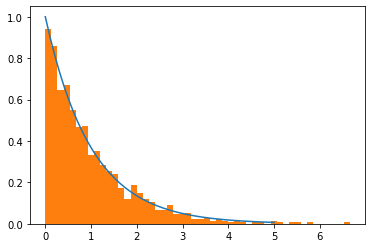

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(72)

N = 1000
U = np.random.rand(N)
X = []

class exponential:
  def __init__(self, mu):
    self.mu = mu # expectation value

  def __call__(self, x):
    return 1 / self.mu * np.exp(-x / self.mu)

  def cdf(self, x):
    return 1 - np.exp(-x / self.mu)

  def sampling(self, u):
    return -self.mu * np.log(u)

dist = exponential(mu=1)
x = np.linspace(0, 5)
plt.plot(x, dist(x))
plt.hist(dist.sampling(U), bins=50, density=True)

(-20.0, 20.0)

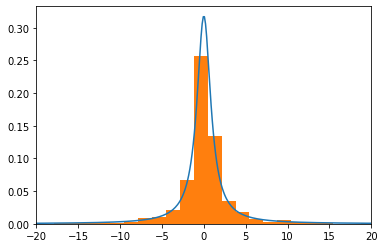

In [3]:
class Cauchy:
  def __init__(self, mu, gamma):
    self.mu = mu # Cauchy principle value
    self.gamma = gamma

  def __call__(self, x):
    return self.gamma / np.pi / ((x - self.mu) ** 2 + self.gamma ** 2)

  def cdf(self, x):
    return 0.5 + 1 / np.pi * np.arctan(x - self.mu / self.sigma)

  def sampling(self, x):
    return self.mu + self.gamma * np.tan(np.pi * (x - 0.5))


dist = Cauchy(mu=0, gamma=1)
x = np.linspace(-20, 20, 300)

plt.plot(x, dist(x))
plt.hist(dist.sampling(U), bins=1000, density=True)
plt.xlim(-20, 20)

### Arcsin distribution

$$
\begin{align}
  p(x) &= \frac{1}{\pi \sqrt{x (1 - x)}},
  \\ F(x) &= \int^{x}_{0} dx p(x) = \frac{2}{\pi} \sin^{-1} \sqrt{x},
  \\ F^{-1}(x) &= \sin^{2} \bigg(\frac{\pi}{2} x \bigg) 
\end{align}
$$

/tmp/ipykernel_1946/2639914700.py:14: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / deno


(array([3.95001676, 2.10000891, 1.650007  , 1.20000509, 0.85000361,
        1.30000552, 1.05000446, 0.85000361, 0.8000034 , 0.65000276,
        1.2500053 , 0.60000255, 0.8000034 , 0.75000318, 0.8000034 ,
        0.65000276, 0.25000106, 0.85000361, 0.65000276, 0.75000318,
        0.70000297, 0.65000276, 0.8000034 , 0.30000127, 0.70000297,
        0.75000318, 0.55000233, 0.50000212, 0.70000297, 0.55000233,
        0.8000034 , 0.75000318, 0.65000276, 0.65000276, 0.85000361,
        0.60000255, 0.90000382, 0.75000318, 0.50000212, 0.8000034 ,
        0.75000318, 0.8000034 , 0.90000382, 0.95000403, 1.15000488,
        1.10000467, 1.30000552, 1.45000615, 1.95000828, 4.45001889]),
 array([4.12004067e-06, 2.00040352e-02, 4.00039503e-02, 6.00038654e-02,
        8.00037805e-02, 1.00003696e-01, 1.20003611e-01, 1.40003526e-01,
        1.60003441e-01, 1.80003356e-01, 2.00003271e-01, 2.20003186e-01,
        2.40003102e-01, 2.60003017e-01, 2.80002932e-01, 3.00002847e-01,
        3.20002762e-01, 3.4000

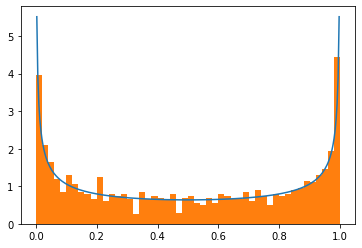

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(72)

N = 1000
U = np.random.rand(N)

class Arcsin:
  def __init__(self):
    pass

  def __call__(self, x):
    deno = np.pi * np.sqrt(x * (1.0- x))
    return 1.0 / deno

  def cdf(self, x):
    return 2.0 * np.arcsin(np.sqrt(x)) / np.pi

  def sampling(self, x):
    return np.sin(np.pi * x / 2.0) ** 2.0

dist = Arcsin()
x = np.linspace(0, 1, 300)

plt.plot(x, dist(x))
plt.hist(dist.sampling(U), bins=50, density=True)
# plt.xlim(-20, 20)

In [62]:
from scipy.integrate import nquad

def ndvolume_trapezoid(step=50):
  rad1 = trapezoid(lambda x: 1, 0.0, 2.0 * np.pi, step)
  rad2 = trapezoid(lambda x: np.sin(x), 0.0, np.pi, step)
  rad3 = trapezoid(lambda x: np.sin(x) ** 2.0, 0.0, np.pi, step)
  rad4 = trapezoid(lambda x: np.sin(x) ** 3.0, 0.0, np.pi, step)
  radius = trapezoid(lambda x: x ** 4, 0, 1, step)
  return radius * rad1 * rad2 * rad3 * rad4

def ndvolume_nquad():
  integrand = lambda r, theta, phi1, phi2, phi3: r ** 4 * np.sin(phi1) ** 3 * np.sin(phi2) ** 2 * np.sin(phi3)
  temp, _ = nquad(integrand, [[0, 1], [0, 2.0 * np.pi], [0, np.pi], [0, np.pi], [0, np.pi]])
  return temp

def ndvolume_mc(step=50):
  rad1 = trapezoid(lambda x: 1, 0.0, 2.0 * np.pi, step)
  rad2 = trapezoid(lambda x: np.sin(x), 0.0, np.pi, step)
  rad3 = trapezoid(lambda x: np.sin(x) ** 2.0, 0.0, np.pi, step)
  rad4 = trapezoid(lambda x: np.sin(x) ** 3.0, 0.0, np.pi, step)
  radius = mc_integrate(lambda x: x ** 4, 0, 1, N=step)
  return radius * rad1 * rad2 * rad3 * rad4

def mc_integrate(fun, x0, x1, N=50, dist=None):
  # np.random.seed(72)
  uni = np.random.uniform(x0, x1, N)
  # dist = dist
  # smpl = dist.sampling(uni)
  smpl = uni
  return np.sum(fun(smpl) / uni) / N

def trapezoid(fun, x0, x1, split=50):
  split = split + 1
  prefactor = (x1 - x0) / (split)
  fa = fun(x0)
  fb = fun(x1)
  mid = 0
  for i in range(1, split):
    mid += fun(i * prefactor + x0)

  return prefactor * (0.5 * (fa + fb) + mid)

def rect(fun, x0, x1, split=50):
  split = split + 1
  prefactor = (x1 - x0) / split
  mid = 0
  for i in range(split-1):
    mid += fun(i * prefactor + x0)
  return prefactor * mid

if __name__ == "__main__":
  from scipy.special import gamma
  dim = 5
  print(f"{dim}d sphere volume")
  vol = np.pi ** (dim / 2) / gamma(dim / 2 + 1)
  print(f"exact value is: {vol}")

  # nq = ndvolume_nquad()
  # print(f"nquad method is: {nq}")
  # print(f"difference is: {abs(vol - nq)}")
  print("nquad method is so slowly...")

  trap = ndvolume_trapezoid(10_000)
  print(f"trapezoid method is: {trap} by split {50}")
  print(f"difference is: {abs(vol - trap)}")

  mc = ndvolume_mc(10_000)
  print(f"Monte Calro method is: {mc} by split {50}")
  print(f"difference is: {abs(vol - mc)}")

  foo = rect(lambda x: x ** 2.0 + x + 1.0, 0.0, 1.0)
  print(foo)

  foo = mc_integrate(lambda x: x ** 2.0 + x + 1.0, 0.0, 1.0)
  print(foo)

  # points = [10 ** n for n in range(6)]
  # diff_t = []
  # diff_m = []
  # for n in points:
  #   foo = ndvolume_trapezoid(n)
  #   diff = abs(vol - foo)
  #   diff_t.append(diff)

  #   foo = ndvolume_mc(n)
  #   diff = abs(vol - foo)
  #   diff_m.append(diff)

  # plt.plot(points, diff_t)
  # plt.plot(points, diff_m)
  # plt.xscale("log")
  # plt.yscale("log")
  # plt.plot()




  

5d sphere volume
exact value is: 5.263789013914324
nquad method is so slowly...
trapezoid method is: 5.263789058342332 by split 50
difference is: 4.442800793924562e-08
Monte Calro method is: 6.62562052510458 by split 50
difference is: 1.361831511190256
1.7561119026618717
14.608238834786867
